In [8]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [9]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
data = web.DataReader('WIPRO.NS', 'yahoo', '2016-01-01','2022-09-30')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1658 entries, 2016-01-01 to 2022-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1658 non-null   float64
 1   Low        1658 non-null   float64
 2   Open       1658 non-null   float64
 3   Close      1658 non-null   float64
 4   Volume     1658 non-null   float64
 5   Adj Close  1658 non-null   float64
dtypes: float64(6)
memory usage: 90.7 KB


In [11]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972610
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485062
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913


<AxesSubplot:xlabel='Date'>

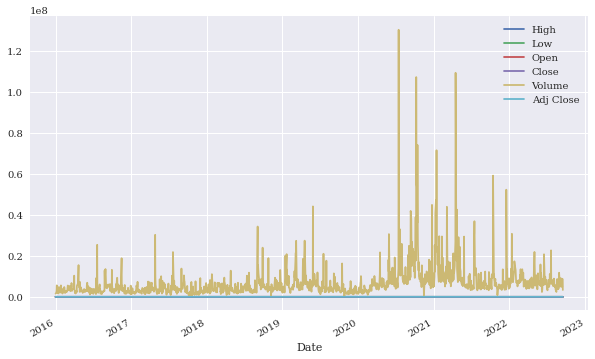

In [14]:
data.plot(figsize=(10,6))

In [15]:
data.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,1658.00,1658.00,1658.00,1658.00,1.658000e+03,1658.00
mean,311.14,303.92,307.75,307.41,6.790160e+06,303.15
std,148.03,144.50,146.47,146.07,8.157386e+06,145.92
min,165.75,153.04,159.38,162.35,1.900540e+05,159.62
25%,207.72,203.64,205.50,205.98,3.064312e+06,200.57
50%,245.96,240.53,243.65,243.65,4.770982e+06,239.28
75%,407.95,400.61,404.99,405.09,7.513632e+06,403.72
max,739.85,716.00,722.75,721.50,1.303676e+08,714.38


In [17]:
data.mean().round(2)

High             311.14
Low              303.92
Open             307.75
Close            307.41
Volume       6790160.40
Adj Close        303.15
dtype: float64

In [19]:
data.diff().tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-12,4.949982,6.699982,2.850006,4.850006,-1496459.0,4.850006
2022-09-13,1.600006,3.450012,5.049988,0.649994,-1135045.0,0.649994
2022-09-14,-3.299988,-12.500000,-15.899994,-6.350006,4087815.0,-6.350006
2022-09-15,-1.800018,4.250000,10.700012,-1.250000,-3471825.0,-1.250000
2022-09-16,-8.149994,-7.250000,-6.950012,-7.199982,-1956274.0,-7.199982


In [21]:
data.pct_change().round(2).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-12,0.01,0.02,0.01,0.01,-0.20,0.01
2022-09-13,0.00,0.01,0.01,0.00,-0.19,0.00
2022-09-14,-0.01,-0.03,-0.04,-0.02,0.87,-0.02
2022-09-15,-0.00,0.01,0.03,-0.00,-0.39,-0.00
2022-09-16,-0.02,-0.02,-0.02,-0.02,-0.37,-0.02


<AxesSubplot:>

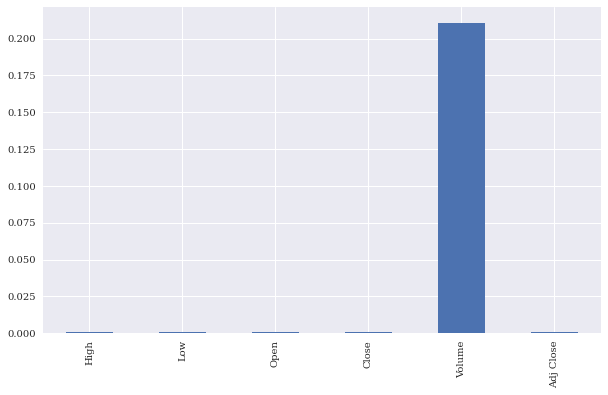

In [22]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [23]:
rets = np.log(data/data.shift(1))
rets


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.000357,0.003423,-0.005014,0.002244,0.080719,0.002244
2016-01-05,0.008889,-0.003152,0.008937,-0.001436,0.311868,-0.001436
2016-01-06,-0.009246,-0.002258,-0.008937,-0.003237,0.267235,-0.003237
2016-01-07,-0.004207,-0.010726,-0.007207,-0.009503,0.600938,-0.009503
...,...,...,...,...,...,...
2022-09-12,0.011732,0.016157,0.006811,0.011559,-0.228153,0.011559
2022-09-13,0.003763,0.008219,0.011956,0.001539,-0.216147,0.001539
2022-09-14,-0.007777,-0.030105,-0.038139,-0.015138,0.625391,-0.015138


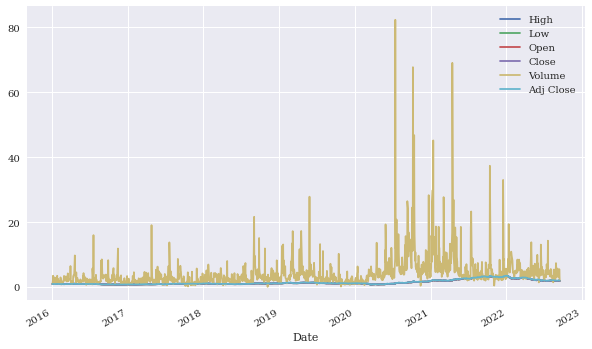

In [24]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6));

In [25]:
data.resample('1w', label='right').last().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-03,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972610
2016-01-10,209.193802,206.081299,207.037552,208.425049,2324151.0,200.737869
2016-01-17,205.818802,201.375046,204.975052,203.662552,1667087.0,196.151016
2016-01-24,208.387558,205.162552,208.387558,206.287552,2222631.0,198.679199
2016-01-31,212.137558,205.725052,205.725052,211.050049,3867287.0,205.130524


<AxesSubplot:xlabel='Date'>

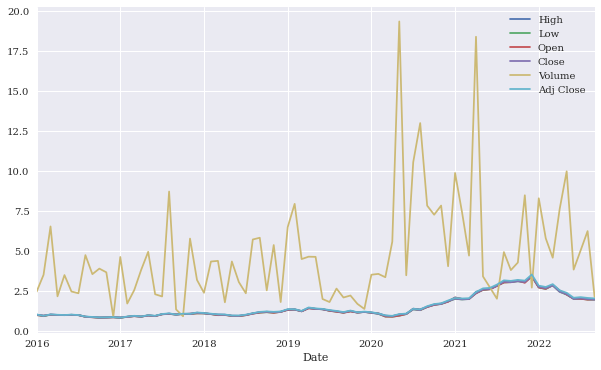

In [27]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))

## Rolling Statistics

In [28]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972610
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485062
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913
...,...,...,...,...,...,...
2022-09-12,424.399994,418.049988,419.850006,422.000000,5839212.0,422.000000
2022-09-13,426.000000,421.500000,424.899994,422.649994,4704167.0,422.649994
2022-09-14,422.700012,409.000000,409.000000,416.299988,8791982.0,416.299988


In [33]:

window = 20
data['min'] = data['Close'].rolling(window=window).min()
data['mean'] = data['Close'].rolling(window=window).mean()
data['std'] = data['Close'].rolling(window= window).std()
data['median'] = data['Close'].rolling(window=window).median()
data['max'] = data['Close'].rolling(window=window).max()
data['ewma'] = data['Close'].ewm(halflife=0.5, min_periods=window).mean()

In [34]:
data

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972610,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485062,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12,424.399994,418.049988,419.850006,422.000000,5839212.0,422.000000,404.350006,418.720001,11.900555,416.399994,443.049988,420.422065
2022-09-13,426.000000,421.500000,424.899994,422.649994,4704167.0,422.649994,404.350006,418.047501,11.227729,416.399994,443.049988,422.093012
2022-09-14,422.700012,409.000000,409.000000,416.299988,8791982.0,416.299988,404.350006,417.007500,10.294607,416.224991,443.049988,417.748244


<AxesSubplot:xlabel='Date'>

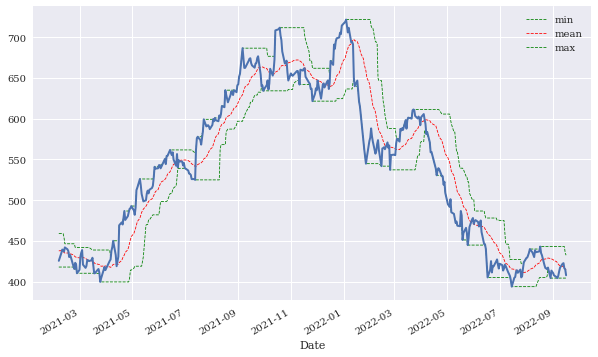

In [39]:
ax = data[['min','mean','max',]].iloc[-400:].plot(
figsize=(10,6),
style=['g--','r--','g--'],lw=0.8)
data['Close'].iloc[-400:].plot(ax=ax, lw=2.0)

In [40]:
data['SMA1'] = data['Close'].rolling(window=42).mean()
data['SMA2'] = data['Close'].rolling(window=252).mean()

In [41]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma,SMA1,SMA2
Date,,,,,,,,,,,,,,
2022-09-12,424.399994,418.049988,419.850006,422.000000,5839212.0,422.000000,404.350006,418.720001,11.900555,416.399994,443.049988,420.422065,418.336907,556.322024
2022-09-13,426.000000,421.500000,424.899994,422.649994,4704167.0,422.649994,404.350006,418.047501,11.227729,416.399994,443.049988,422.093012,418.658335,555.323611
2022-09-14,422.700012,409.000000,409.000000,416.299988,8791982.0,416.299988,404.350006,417.007500,10.294607,416.224991,443.049988,417.748244,418.886906,554.347818
2022-09-15,420.899994,413.250000,419.700012,415.049988,5320157.0,415.049988,404.350006,415.607500,8.271767,415.675003,435.049988,415.724552,419.210715,553.366469
2022-09-16,412.750000,406.000000,412.750000,407.850006,3363883.0,407.850006,404.350006,414.247501,7.053169,415.125000,432.450012,409.818643,419.544048,552.323215


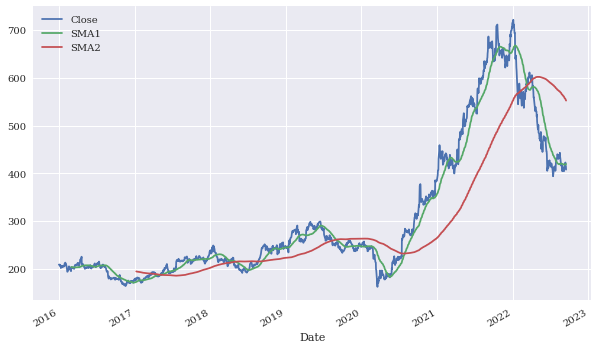

In [43]:
data[['Close','SMA1','SMA2']].plot(figsize=(10,6));

In [47]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1, -1
                           )

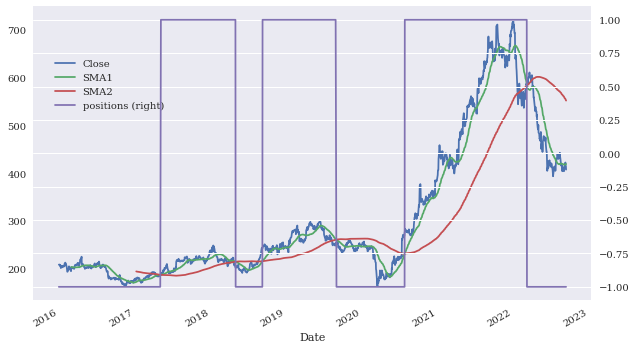

In [49]:
ax = data[['Close', 'SMA1','SMA2','positions']].plot(figsize=(10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

## Correlation Analysis

## Logarithmic Returns

In [50]:
rets

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.000357,0.003423,-0.005014,0.002244,0.080719,0.002244
2016-01-05,0.008889,-0.003152,0.008937,-0.001436,0.311868,-0.001436
2016-01-06,-0.009246,-0.002258,-0.008937,-0.003237,0.267235,-0.003237
2016-01-07,-0.004207,-0.010726,-0.007207,-0.009503,0.600938,-0.009503
...,...,...,...,...,...,...
2022-09-12,0.011732,0.016157,0.006811,0.011559,-0.228153,0.011559
2022-09-13,0.003763,0.008219,0.011956,0.001539,-0.216147,0.001539
2022-09-14,-0.007777,-0.030105,-0.038139,-0.015138,0.625391,-0.015138


array([<AxesSubplot:xlabel='Date'>], dtype=object)

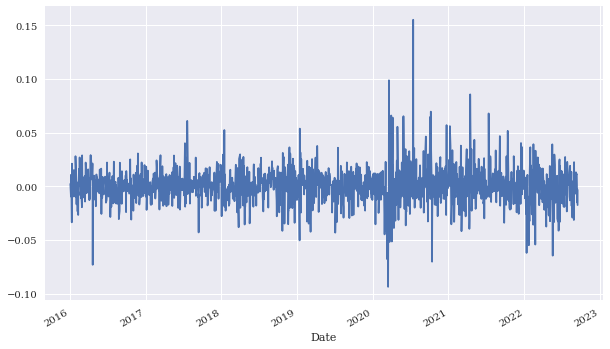

In [53]:
rets['Close'].plot(subplots= True, figsize=(10,6))

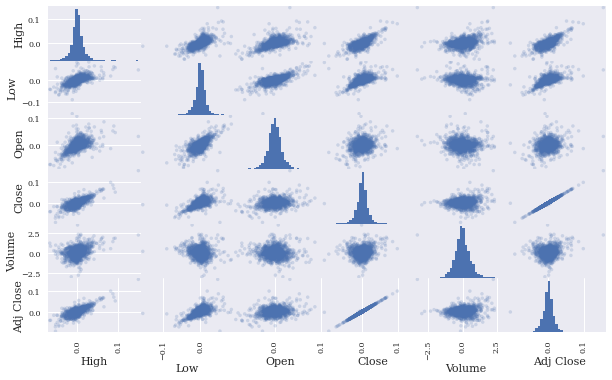

In [58]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins':35}, 
                          figsize=(10,6));

## OLS Regression

## Correlation

## High Frequency Data

In [62]:
data

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma,SMA1,SMA2,positons,positions
Date,,,,,,,,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12,424.399994,418.049988,419.850006,422.000000,5839212.0,422.000000,404.350006,418.720001,11.900555,416.399994,443.049988,420.422065,418.336907,556.322024,-1,-1
2022-09-13,426.000000,421.500000,424.899994,422.649994,4704167.0,422.649994,404.350006,418.047501,11.227729,416.399994,443.049988,422.093012,418.658335,555.323611,-1,-1
2022-09-14,422.700012,409.000000,409.000000,416.299988,8791982.0,416.299988,404.350006,417.007500,10.294607,416.224991,443.049988,417.748244,418.886906,554.347818,-1,-1
